# 1. Importing Libraries 

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 2. Loading Dataset 

In [105]:
data = pd. read_csv('dataset/spam.csv', encoding='latin')

In [106]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [107]:
# Alternatively, you can drop columns directly by indexing the DataFrame
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [109]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Data Preprocessing 

In [110]:
X = data["v2"]  # Email text
y = data["v1"]  # Labels (ham or spam)

# 4. EDA 

## (i) Class Distribution 

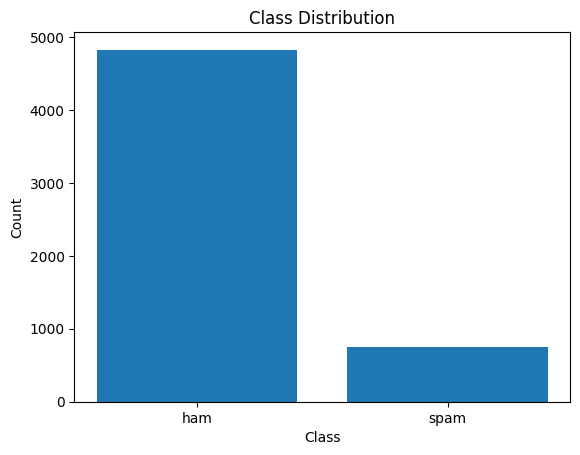

In [111]:
class_counts = data['v1'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## (ii) Email Length Analysis 

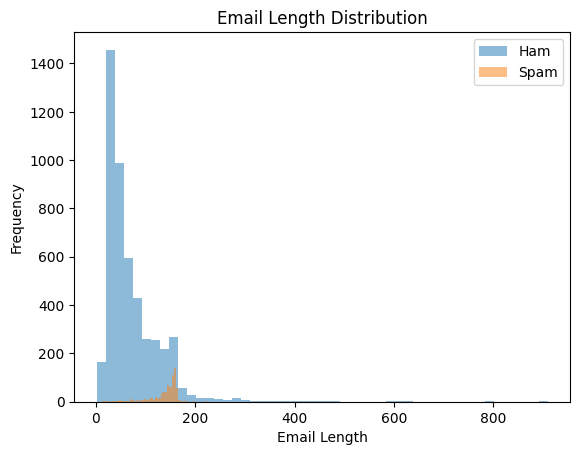

In [112]:
data['email_length'] = data['v2'].apply(len)  # Calculate email length
plt.hist(data[data['v1'] == 'ham']['email_length'], bins=50, alpha=0.5, label='Ham')
plt.hist(data[data['v1'] == 'spam']['email_length'], bins=50, alpha=0.5, label='Spam')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Email Length Distribution')
plt.legend()
plt.show()

## (iii) Word Frequency Analysis

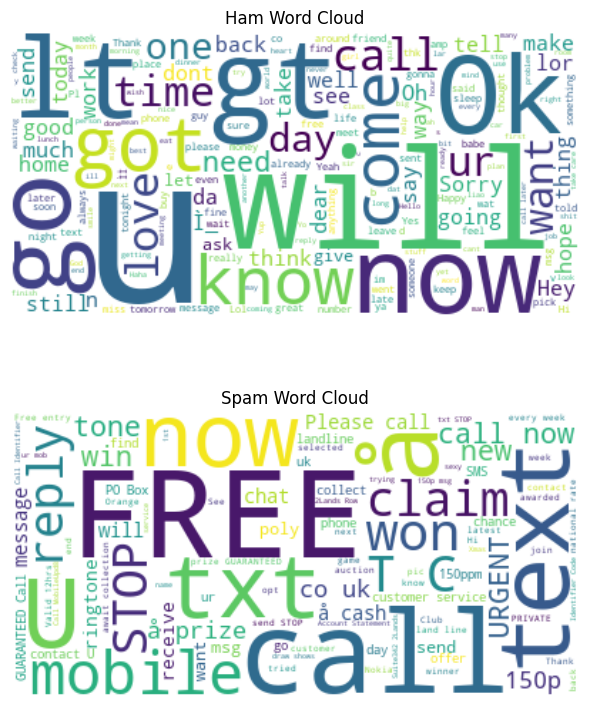

In [113]:
ham_text = ' '.join(data[data['v1'] == 'ham']['v2'])
spam_text = ' '.join(data[data['v1'] == 'spam']['v2'])

wordcloud_ham = WordCloud(width=400, height=200, background_color='white').generate(ham_text)
wordcloud_spam = WordCloud(width=400, height=200, background_color='white').generate(spam_text)

plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Splitting the data 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Text Vectorization 

In [115]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Build & Training the model 

In [116]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

# 7. Make Predictions 

In [117]:
predictions = model.predict(X_test_vec)

# 8. Model Evaluation 

In [118]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("\n\nClassification Report:\n", report)

Accuracy: 0.9838565022421525


Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

